## Importing Model

`resnet50_2020-07-20` is being used using retinaface (multibox detection model).

In [1]:
%%capture

%pip install retinaface-pytorch

In [2]:
from matplotlib import pyplot as plt
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations
from PIL import ImageOps
import torch
import numpy as np

In [3]:
import zipfile
from pathlib import Path

zip_path = Path("img-set-1.zip")

# Specify the directory where you want to extract the files
extract_path = Path("")

# Create a ZipFile object and extract
main_path = Path("img-set-1")
if not main_path.exists():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)


    # Renaming these files as their path was too long for git
    file1_name = main_path / Path(r"multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait-interracial-friends-two-male-african-guys-relaxing-with-their-girlfriend-bed_149066-2171.jpg")
    file2_name = main_path / Path(r"multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait-interracial-friends-two-male-african-guys-relaxing-with-their-girlfriend-bed_149066-2171-rot.jpg")
    file1_name.rename(main_path / Path("multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait_149066-2171.jpg"))
    file2_name.rename(main_path / Path("multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait_149066-2171-rot.jpg"))

    print(f"Zip file extracted to: {extract_path}")

Zip file extracted to: .


In [4]:
from pathlib import Path
import numpy as np
from PIL import Image, ImageOps


main_path = Path("img-set-1")
all_images = list(main_path.glob("*jp*"))

img = Image.open(all_images[2])
img = ImageOps.exif_transpose(img)
img_array = np.array(img)


In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
model = get_model("resnet50_2020-07-20", max_size=2048, device=device)

model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/ternaus/retinaface/releases/download/0.01/retinaface_resnet50_2020-07-20-f168fae3c.zip" to /root/.cache/torch/hub/checkpoints/retinaface_resnet50_2020-07-20-f168fae3c.zip
100%|██████████| 96.9M/96.9M [00:00<00:00, 131MB/s]
/usr/local/lib/python3.11/dist-packages/torch/hub.py:870: FutureWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in

## Functions for :
1. Padding `bbox` to get a better size of the head
2. Finding angle (0 - 360)

In [7]:
import math

def expand_bbox(bbox, scale=1.5):
    x_min, y_min, x_max, y_max = bbox
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    new_width = width * scale
    new_height = height * scale
    new_x_min = center_x - new_width / 2
    new_x_max = center_x + new_width / 2
    new_y_min = center_y - new_height / 2
    new_y_max = center_y + new_height / 2
    return [int(new_x_min), int(new_y_min), int(new_x_max), int(new_y_max)]


def find_angle(points: tuple):
    x1, y1 = points[0]
    x2, y2 = points[1]
    vector = np.array((x2 - x1, y2 - y1))
    mag = math.sqrt((vector ** 2).sum())
    unit_vec = vector / mag

    # Angle with respect to x-axis
    angle_rad = math.acos(unit_vec[0])
    # If y component is negative, adjust angle to (360 - angle)
    if unit_vec[1] < 0:
        angle_rad = 2 * math.pi - angle_rad
    angle_deg = math.degrees(angle_rad)

    return angle_deg

## Main Loop

  0%|          | 0/30 [00:00<?, ?it/s]

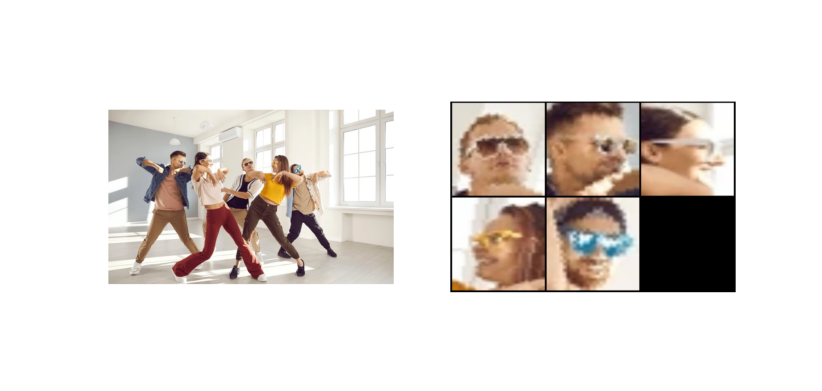

  3%|▎         | 1/30 [00:05<02:26,  5.05s/it]

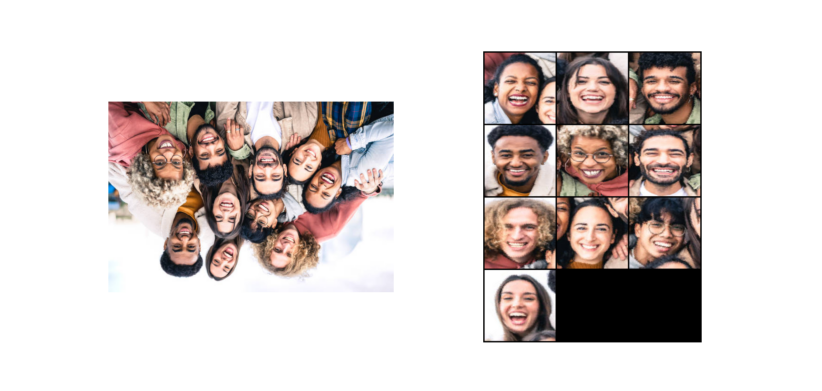

  7%|▋         | 2/30 [00:07<01:37,  3.47s/it]

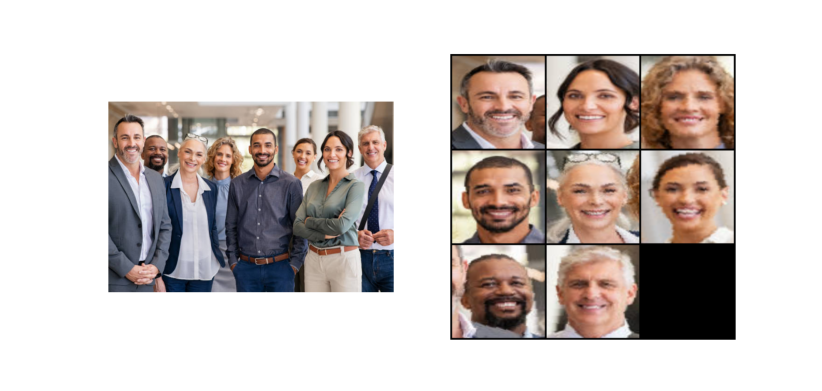

 10%|█         | 3/30 [00:09<01:13,  2.74s/it]

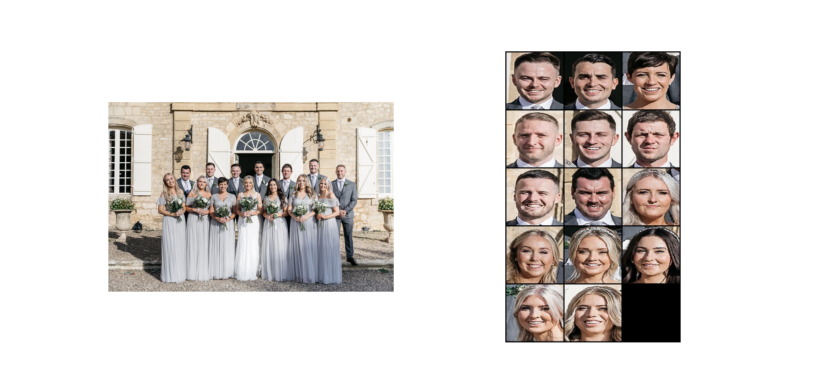

 13%|█▎        | 4/30 [00:12<01:14,  2.88s/it]

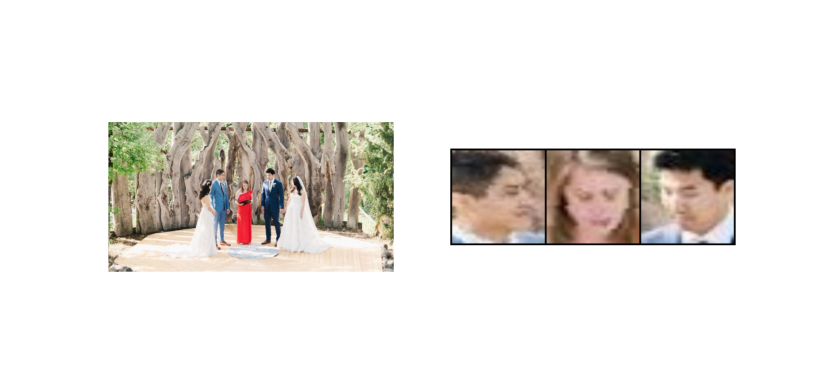

 17%|█▋        | 5/30 [00:13<00:55,  2.23s/it]

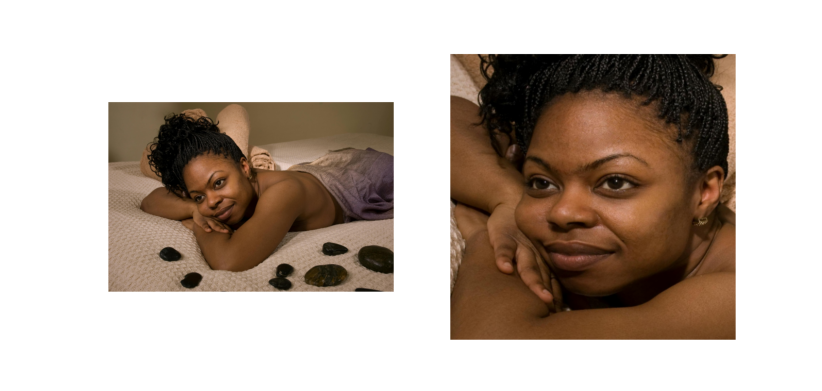

 20%|██        | 6/30 [00:14<00:46,  1.96s/it]

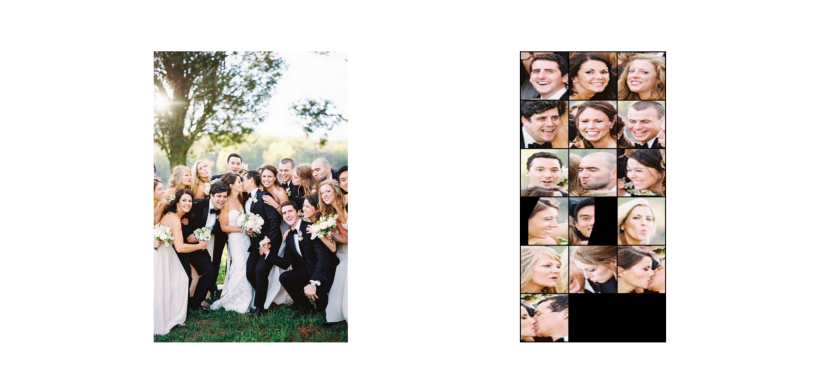

 23%|██▎       | 7/30 [00:18<00:55,  2.42s/it]

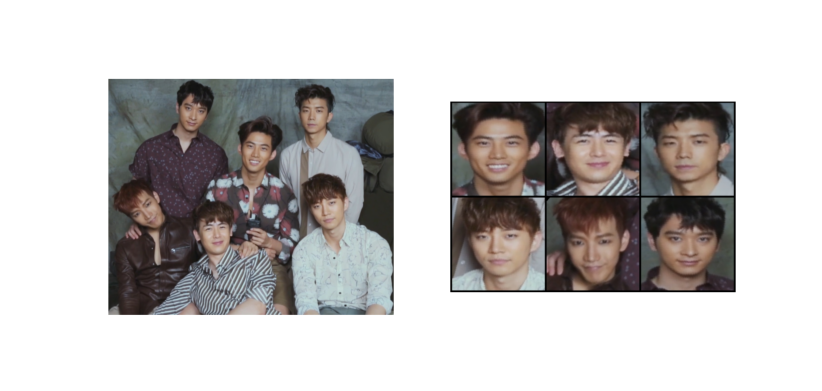

 27%|██▋       | 8/30 [00:19<00:48,  2.19s/it]

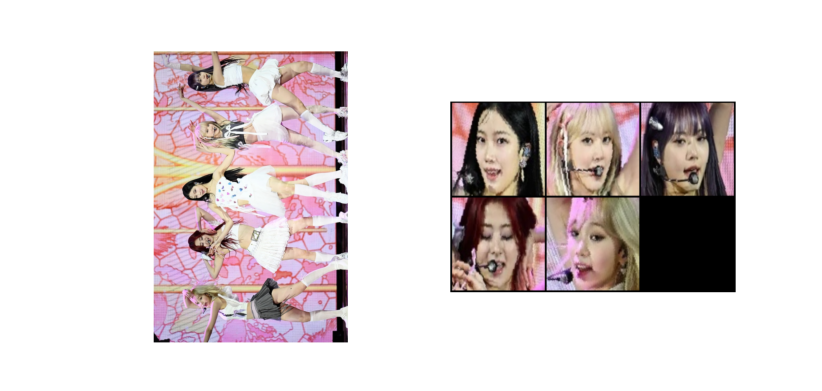

 30%|███       | 9/30 [00:21<00:40,  1.95s/it]

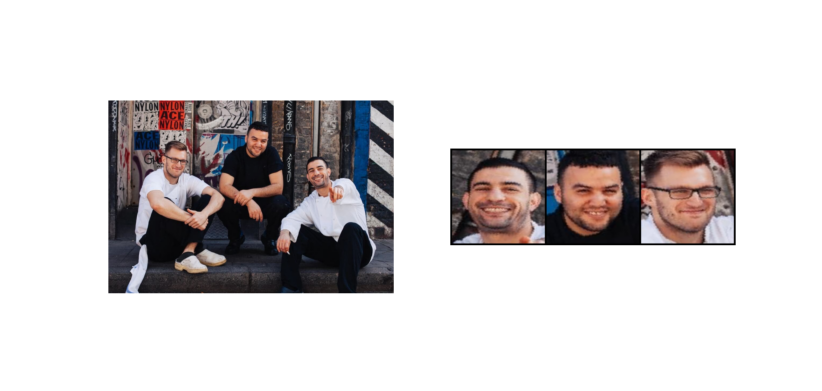

 33%|███▎      | 10/30 [00:22<00:33,  1.69s/it]

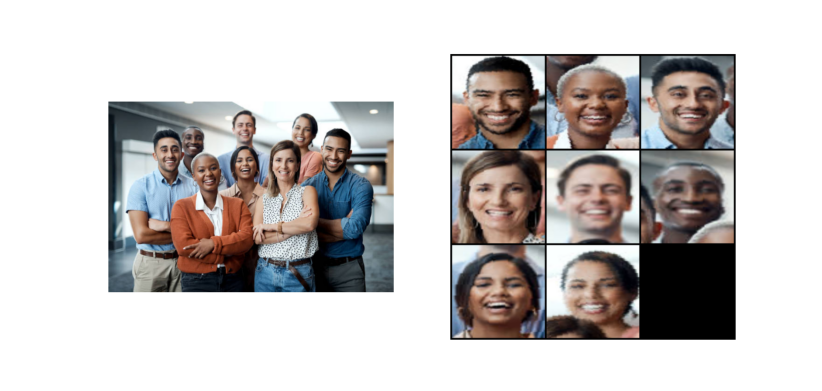

 37%|███▋      | 11/30 [00:24<00:31,  1.68s/it]

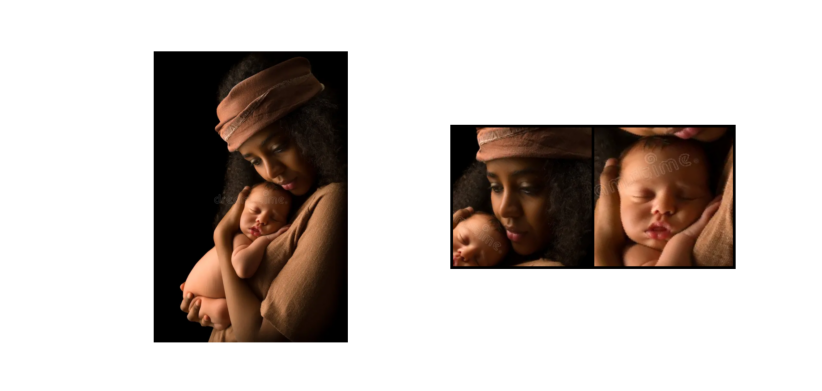

 40%|████      | 12/30 [00:25<00:26,  1.47s/it]

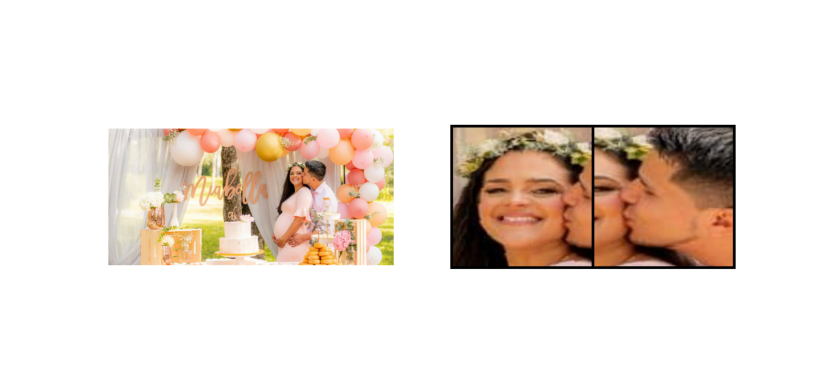

 43%|████▎     | 13/30 [00:26<00:22,  1.32s/it]

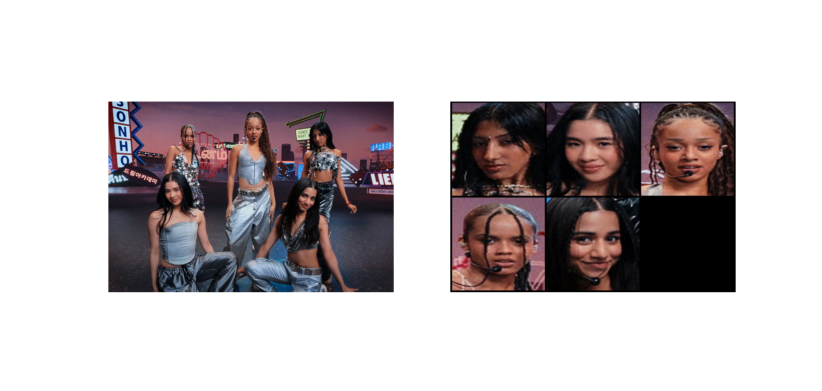

 47%|████▋     | 14/30 [00:27<00:21,  1.37s/it]

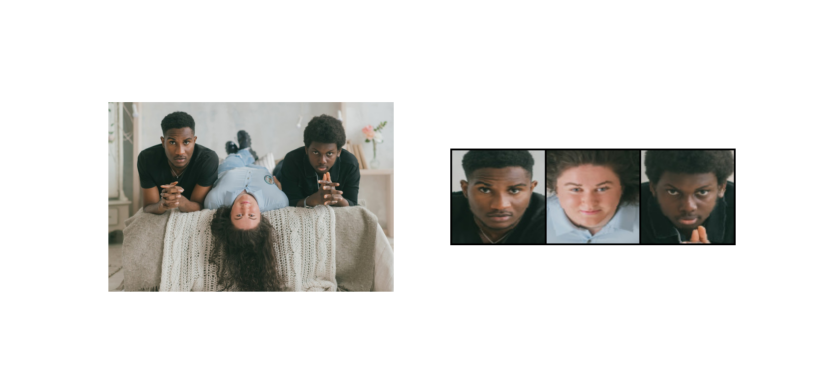

 50%|█████     | 15/30 [00:28<00:20,  1.35s/it]

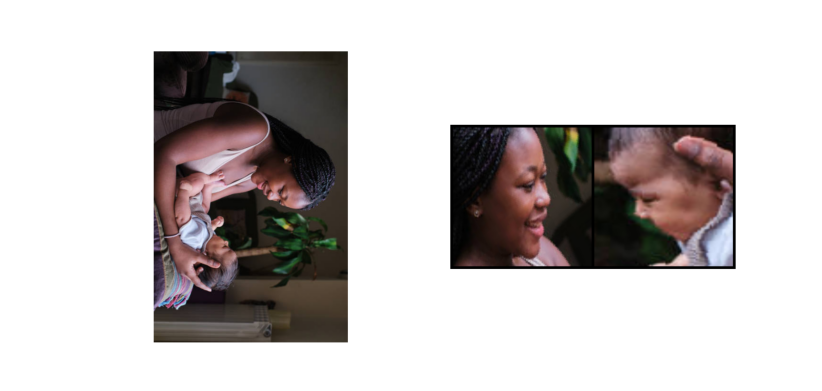

 53%|█████▎    | 16/30 [00:30<00:18,  1.30s/it]

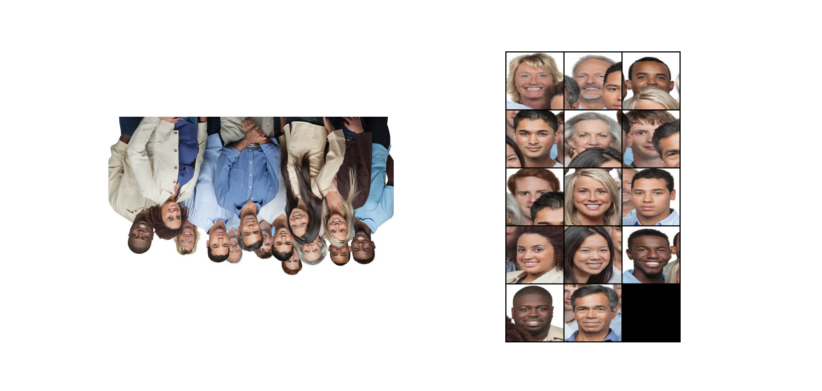

 57%|█████▋    | 17/30 [00:32<00:21,  1.63s/it]

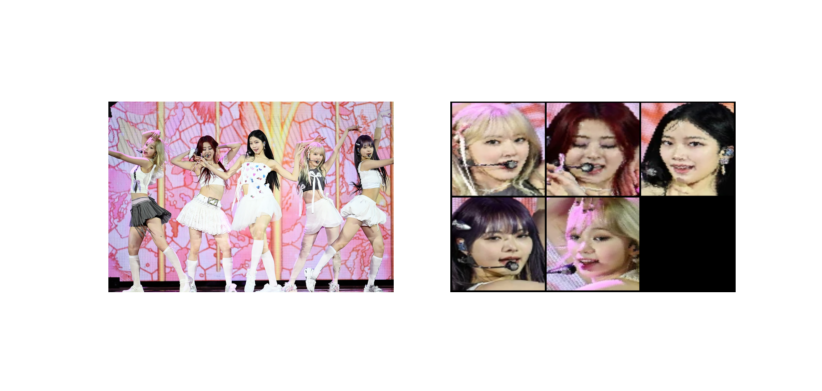

 60%|██████    | 18/30 [00:34<00:19,  1.60s/it]

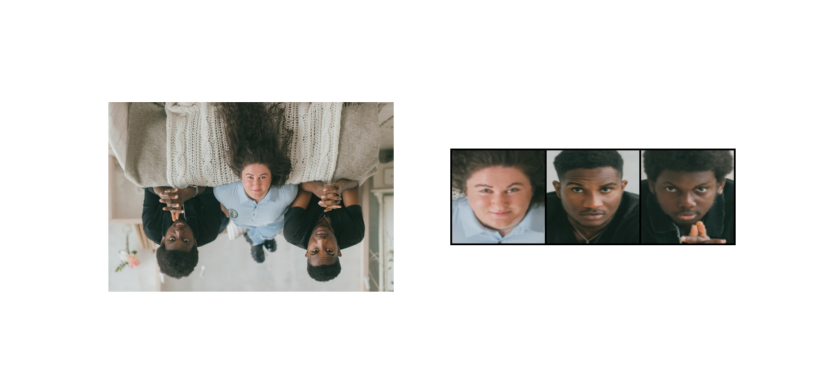

 63%|██████▎   | 19/30 [00:35<00:15,  1.42s/it]

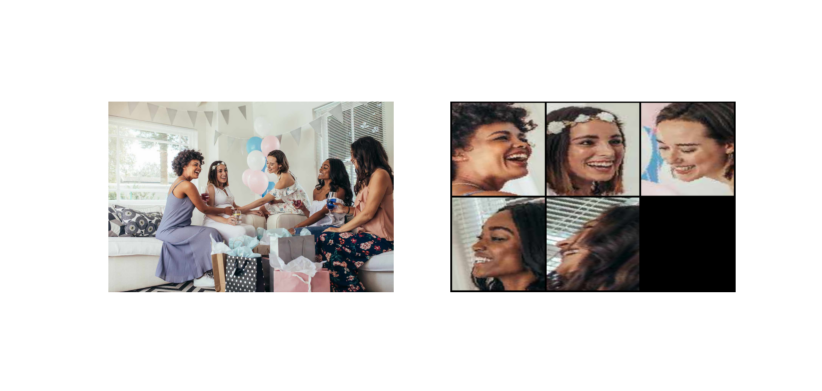

 67%|██████▋   | 20/30 [00:36<00:14,  1.41s/it]

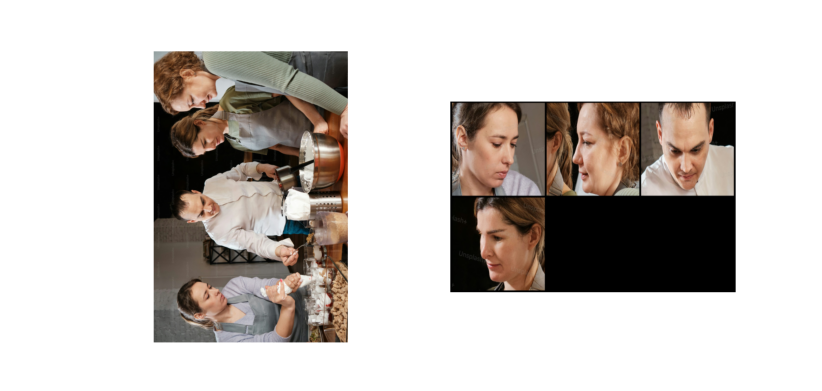

 70%|███████   | 21/30 [00:38<00:13,  1.54s/it]

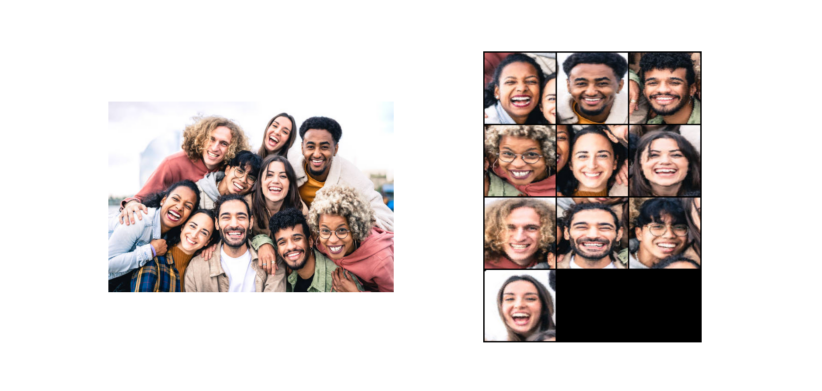

 73%|███████▎  | 22/30 [00:40<00:13,  1.67s/it]

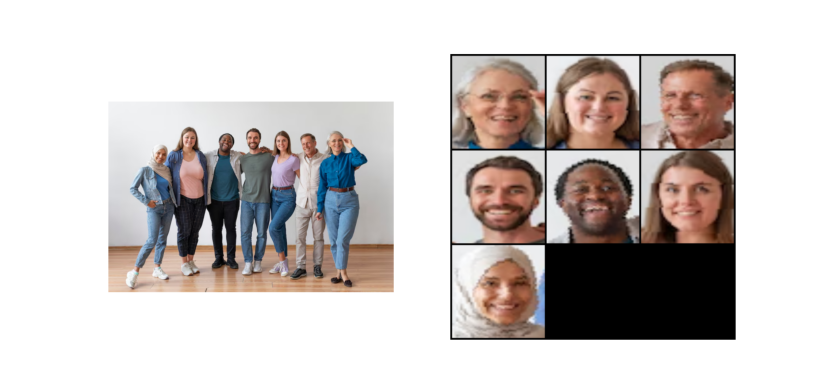

 77%|███████▋  | 23/30 [00:42<00:12,  1.77s/it]

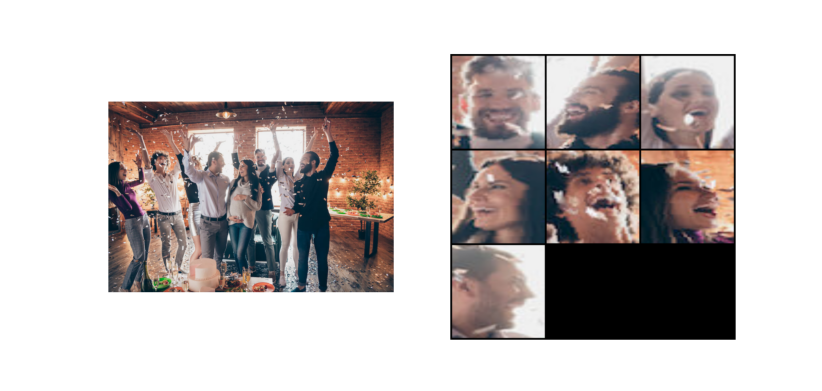

 80%|████████  | 24/30 [00:43<00:10,  1.72s/it]

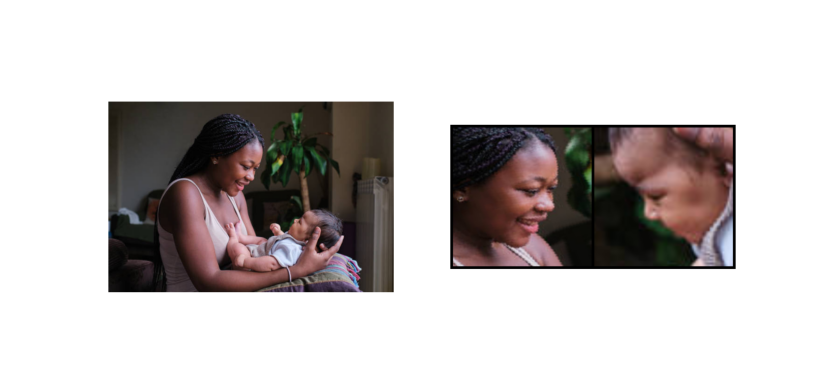

 83%|████████▎ | 25/30 [00:44<00:07,  1.48s/it]

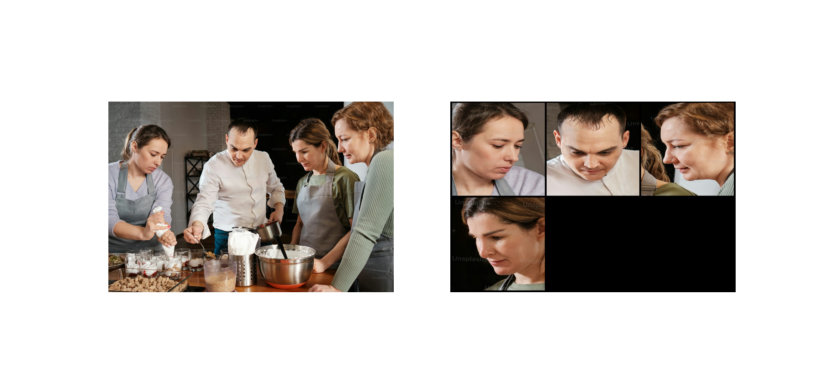

 87%|████████▋ | 26/30 [00:46<00:06,  1.58s/it]

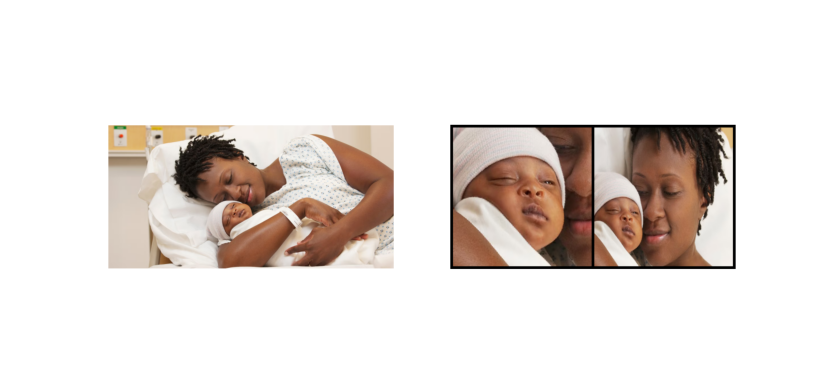

 90%|█████████ | 27/30 [00:47<00:04,  1.42s/it]

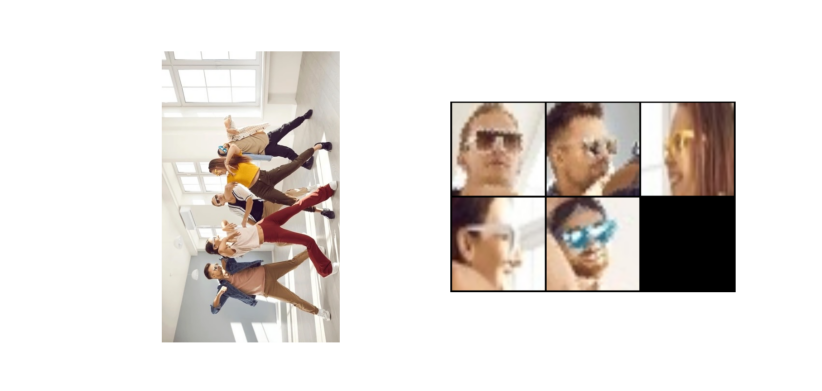

 93%|█████████▎| 28/30 [00:48<00:02,  1.34s/it]

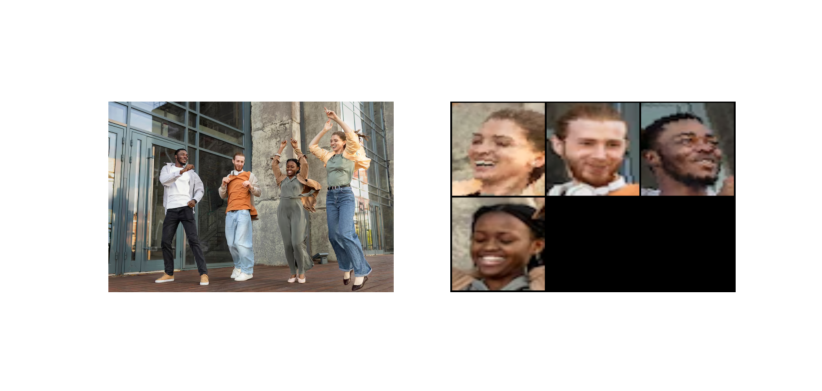

 97%|█████████▋| 29/30 [00:49<00:01,  1.30s/it]

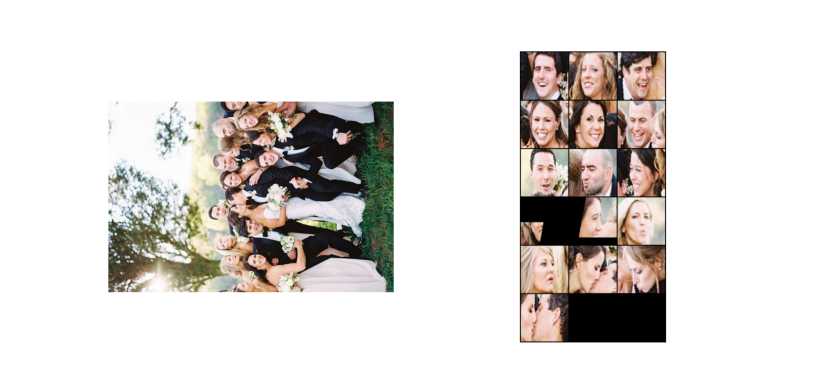

100%|██████████| 30/30 [00:52<00:00,  1.75s/it]


In [8]:
from tqdm import tqdm
from pathlib import Path
from PIL import Image
from torchvision import utils as vutils
from torchvision import transforms

main_path = Path("img-set-1")
all_images = list(main_path.glob("*.jp*"))

out_main_path = Path("cropped_corrected")
out_main_path.mkdir(exist_ok=True)

for i, img_pth in enumerate(tqdm(all_images)):

    img = Image.open(img_pth)
    img = ImageOps.exif_transpose(img)
    img_array = np.array(img)

    out_annotations = model.predict_jsons(img_array, confidence_threshold=0.9)

    for i in range(len(out_annotations)):
        out_annotations[i]['bbox'] = expand_bbox(out_annotations[i]['bbox'])
    n_crops = len(out_annotations)
    cropped_imgs = []

    Path(out_main_path / img_pth.stem).mkdir(exist_ok=True)

    for i, a in enumerate(out_annotations):
        bbox = a["bbox"]
        w = abs(bbox[0] - bbox[2])
        h = abs(bbox[1] - bbox[3])

        points = a["landmarks"]
        angle = find_angle(points)

        rotated_main_img = img.rotate(angle, center=(bbox[0] + w//2, bbox[1] + h//2))

        crop_img = rotated_main_img.crop(a["bbox"])
        transform = transforms.Compose([
            transforms.PILToTensor(),
            transforms.Resize((512, 512))
        ])
        transformed_img = transform(crop_img)
        cropped_imgs.append(transformed_img)

        pil_img : Image.Image = transforms.ToPILImage()(transformed_img)
        pil_img.save(out_main_path / img_pth.stem / f"{i}.png")

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis(False)

    grid = vutils.make_grid(cropped_imgs, padding=10, nrow=3)
    plt.subplot(1, 2, 2)
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis(False)

    plt.savefig(out_main_path / f"{img_pth.stem}.png")
    plt.close()

    plt.figure(figsize=(15, 7), dpi=70)
    plt.imshow(Image.open(out_main_path / f"{img_pth.stem}.png"))
    plt.axis('off')

    plt.show()